<a href="https://colab.research.google.com/github/BuiChiCuongs/BT_AI_W5/blob/main/BT_AI_W5_GfrFIS_20146167.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b579bb51847fb4b9b5a9f7d8ea5a763283f195070085568f8efffcb975272371
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


22.333333333333336


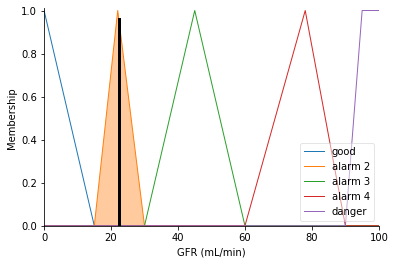

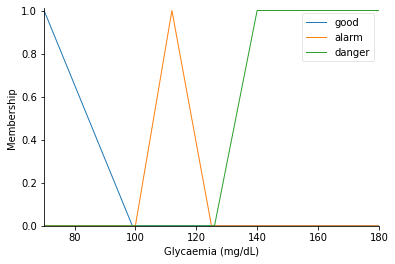

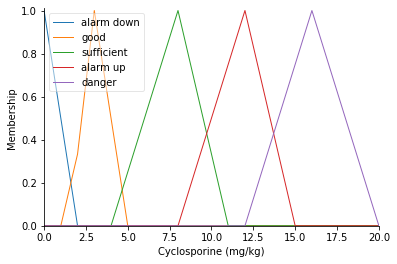

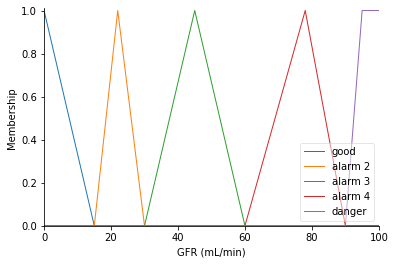

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 


Glycaemia = ctrl.Antecedent(np.arange(70,181,1),'Glycaemia (mg/dL)')
Cyclosporine = ctrl.Antecedent(np.arange(0,21,1),'Cyclosporine (mg/kg)')
GFR_Level = ctrl.Consequent(np.arange(0,101,1),'GFR (mL/min)')

Glycaemia['good'] = fuzz.trimf(Glycaemia.universe,[70,70,99])
Glycaemia['alarm'] = fuzz.trimf(Glycaemia.universe,[100,112,125])
Glycaemia['danger'] = fuzz.trapmf(Glycaemia.universe,[126,140,180,180])

Cyclosporine['alarm down'] = fuzz.trimf(Cyclosporine.universe,[0,0,2])
Cyclosporine['good'] = fuzz.trimf(Cyclosporine.universe,[1.5,3,5])
Cyclosporine['sufficient'] = fuzz.trimf(Cyclosporine.universe,[4,8,11])
Cyclosporine['alarm up'] = fuzz.trimf(Cyclosporine.universe,[8,12,15])
Cyclosporine['danger'] = fuzz.trimf(Cyclosporine.universe,[12,16,20])

GFR_Level['good'] = fuzz.trimf(GFR_Level.universe,[0,0,15])
GFR_Level['alarm 2'] = fuzz.trimf(GFR_Level.universe,[15,22,30])
GFR_Level['alarm 3'] = fuzz.trimf(GFR_Level.universe,[30,45,60])
GFR_Level['alarm 4'] = fuzz.trimf(GFR_Level.universe,[60,78,90])
GFR_Level['danger'] = fuzz.trapmf(GFR_Level.universe,[90,95,100,100])


rule1 = ctrl.Rule(Glycaemia['danger'] & Cyclosporine['danger'], GFR_Level['danger'])
rule2 = ctrl.Rule(Glycaemia['good'] & Cyclosporine['danger'], GFR_Level['alarm 3'])
rule3 = ctrl.Rule(Glycaemia['alarm'] & Cyclosporine['alarm up'], GFR_Level['alarm 4'])
rule4 = ctrl.Rule(Glycaemia['good'] & Cyclosporine['sufficient'], GFR_Level['alarm 2'])
rule5 = ctrl.Rule(Glycaemia['good'] & Cyclosporine['good'], GFR_Level['good'])
rule6 = ctrl.Rule(Glycaemia['alarm'] & Cyclosporine['good'], GFR_Level['alarm 2'])
rule7 = ctrl.Rule(Glycaemia['danger'] & Cyclosporine['good'], GFR_Level['alarm 3'])

GFR_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])

GFR = ctrl.ControlSystemSimulation(GFR_ctrl)

GFR.input['Glycaemia (mg/dL)'] = 70
GFR.input['Cyclosporine (mg/kg)'] = 8
GFR.compute()
print(GFR.output['GFR (mL/min)'])
GFR_Level.view(sim=GFR)

Glycaemia.view()
Cyclosporine.view()
GFR_Level.view()
